In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


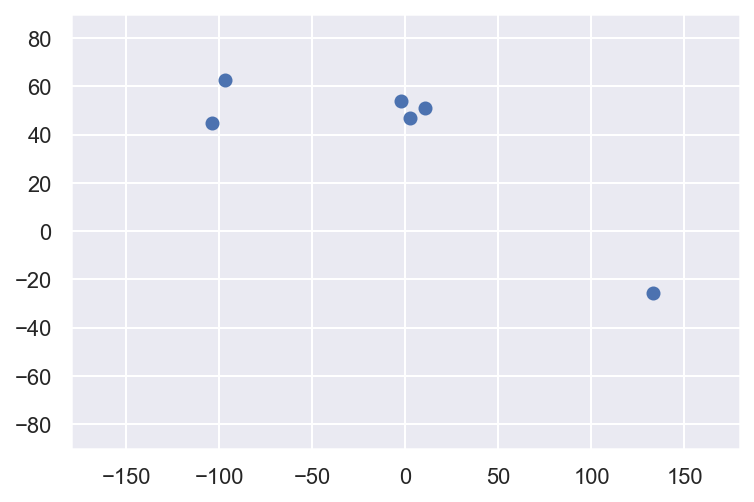

In [4]:
#We plot the data on a scatter plot
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### First, we select the Features

In [5]:
x = data.iloc[:,1:3] # iloc slices a dataframe using the indexes of the rows and columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [41]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
# To see the identified clusters, we use the fit_predict() method
identified = kmeans.fit_predict(x)
identified

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [43]:
# The array above shows us the different clusters that each observation belongs to
# Now we create a dataframe and add this to the data table
data_x_cluster = data.copy()
data_x_cluster['Cluster'] = identified
data_x_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


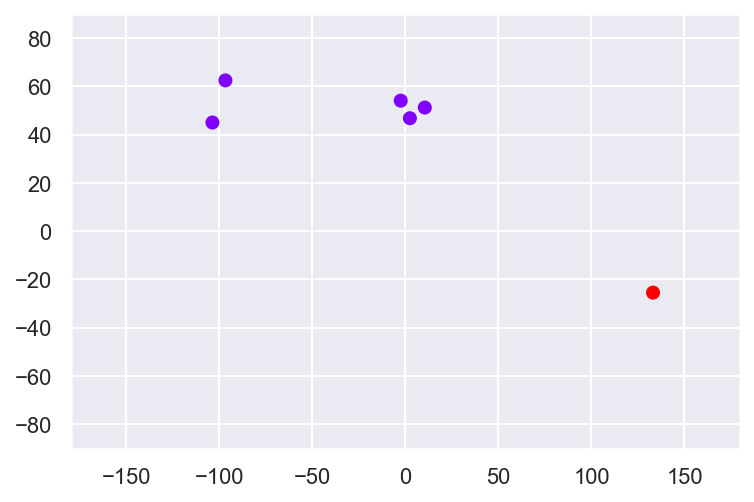

In [44]:
# Now let's plot this on a scatter plot
plt.scatter(data_x_cluster['Longitude'], data_x_cluster['Latitude'], c=data_x_cluster['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [16]:
# What if we use Language as the Feature
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [17]:
data_mapped = data.copy()
data_mapped['Language'] = data['Language'].map({'English':1, 'French':2, 'German':3})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,1
1,Canada,62.40,-96.80,1
2,France,46.75,2.40,2
3,UK,54.01,-2.53,1
4,Germany,51.15,10.40,3
5,Australia,-25.45,133.11,1


In [27]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,1
1,62.40,-96.80,1
2,46.75,2.40,2
3,54.01,-2.53,1
4,51.15,10.40,3
5,-25.45,133.11,1


In [55]:
kmeans = KMeans(6)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
identified = kmeans.fit_predict(x)
identified

array([0, 3, 5, 1, 4, 2], dtype=int32)

In [57]:
data_mapped_cluster = data_mapped.copy()
data_mapped_cluster['Cluster'] = identified
data_mapped_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,1,0
1,Canada,62.40,-96.80,1,3
2,France,46.75,2.40,2,5
3,UK,54.01,-2.53,1,1
4,Germany,51.15,10.40,3,4
5,Australia,-25.45,133.11,1,2


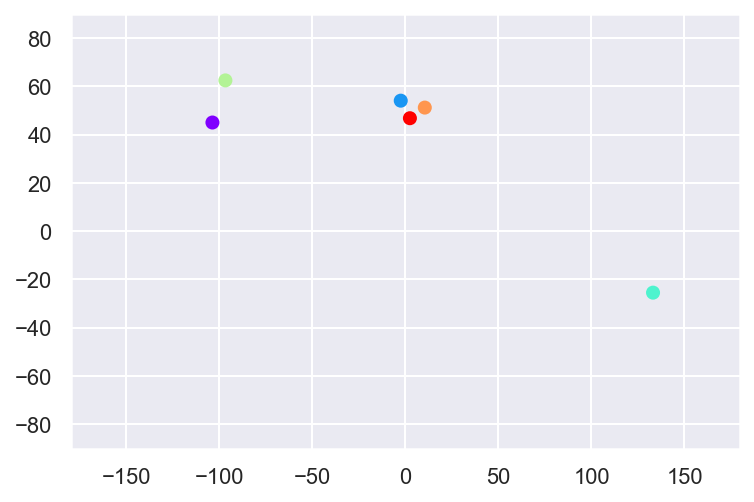

In [58]:
# Now let's plot this on a scatter plot
plt.scatter(data_mapped_cluster['Longitude'], data_mapped_cluster['Latitude'], c=data_mapped_cluster['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [50]:
# Increasing the number of features, the clusters seem to be based on only geography

#### To choose the number of clusters, we reduce the WCSS(Within-Cluster Sum of Squares). This is referred to as the elbow method

In [32]:
kmeans.inertia_ # This is the WCSS value

290.10523333333333

In [74]:
max_clusters = data_mapped_cluster['Country'].count()
max_clusters

6

In [54]:
# To obtain the lowest WCSS value, we need to run the clustering algorithm increasing the number of clusters
k = 1
kmeans = KMeans(k)
kmeans.fit(x)
lowest = kmeans.inertia_

while k < 6:
    k += 1
    kmeans = KMeans(k)
    kmeans.fit(x)
    y = kmeans.inertia_
    if y < lowest:
        lowest = y
    else:
        k -= 1
        break

print("Number of clusters is {0}".format(k))


Number of clusters is 6


In [71]:
#This block of code does the same as above
wcss = []
for i in range (1, max_clusters+1):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

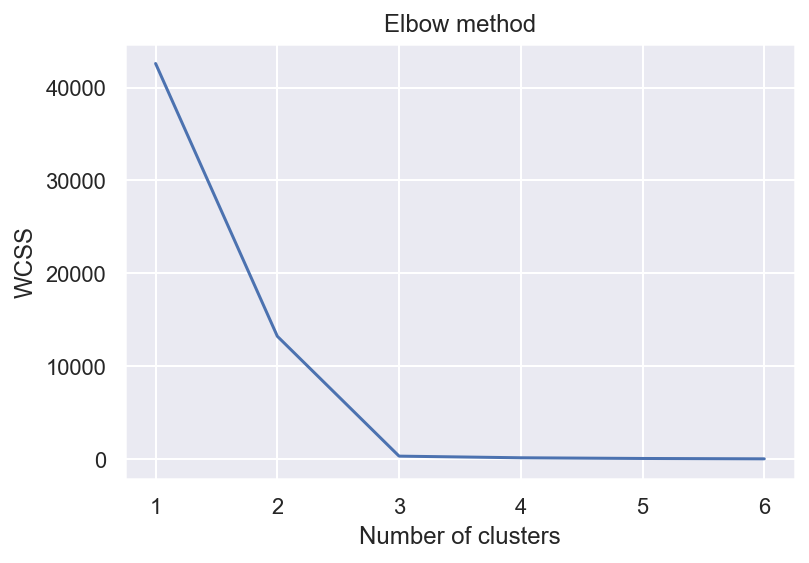

In [72]:
num_clusters = list(range(1,max_clusters+1))
plt.plot(num_clusters, wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
# The Elbow method shows us that the optimal number of clusters is 3 and there is nothing much to gain from anything 
# beyond 3 clusters